In [1]:
import cv2
import cvlib

## Single face Detection from Image

#### Syntax: detect_face(image, threshold=0.5, enable_gpu=False)

In [2]:
image = cv2.imread(filename="Image/alamin2.jpg")

# face =  [[108, 180, 307, 397]] --> output like this
# confidence = [0.99856085] --> output like this

face, confidence = cvlib.detect_face(image=image, threshold=0.5, enable_gpu=True)

x, y, width, height = face[0][0], face[0][1], face[0][2], face[0][3]

cv2.rectangle(img=image, pt1=(x, y), pt2=(width, height), color=(255,0,255), thickness=2, lineType=cv2.LINE_AA)

cv2.imshow(winname="Image", mat=image)
cv2.waitKey()
cv2.destroyAllWindows()

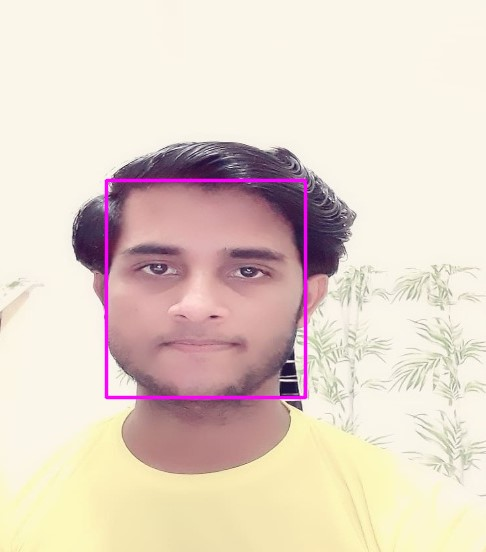

## Single face Detection from Webcam

In [3]:
video_cap = cv2.VideoCapture(0)

while True:
    success, frame = video_cap.read()
    if success == True:

        # face =  [[108, 180, 307, 397]] --> output like this
        # confidence = [0.99856085] --> output like this
        face, confidence = cvlib.detect_face(image=frame, threshold=0.5, enable_gpu=True)
        x, y, width, height = face[0][0], face[0][1], face[0][2], face[0][3],
        cv2.rectangle(img=frame, pt1=(x, y), pt2=(width, height), color=(255,0,255), thickness=2, lineType=cv2.LINE_AA)
        cv2.imshow(winname="Image", mat=frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

video_cap.release()
cv2.destroyAllWindows()

## Multiple faces Detection from Image

In [4]:
# read input image
image = cv2.imread(filename="Image/multipleFace1.jpg")

# apply face detection
faces, confidences = cvlib.detect_face(image=image)

print(faces)
print(confidences)

# loop through detected faces
for face,conf in zip(faces,confidences):

    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]

    # draw rectangle over face
    cv2.rectangle(img=image, pt1=(startX,startY), pt2=(endX,endY), color=(0,255,0), thickness=2)

# display output
# press any key to close window           
cv2.imshow(winname="face_detection", mat=image)
cv2.waitKey()

# save output
# cv2.imwrite("face_detection.jpg", image)

# release resources
cv2.destroyAllWindows()

[[279, 76, 380, 208], [492, 58, 599, 214], [54, 75, 154, 224]]
[0.99993074, 0.9929684, 0.92935467]


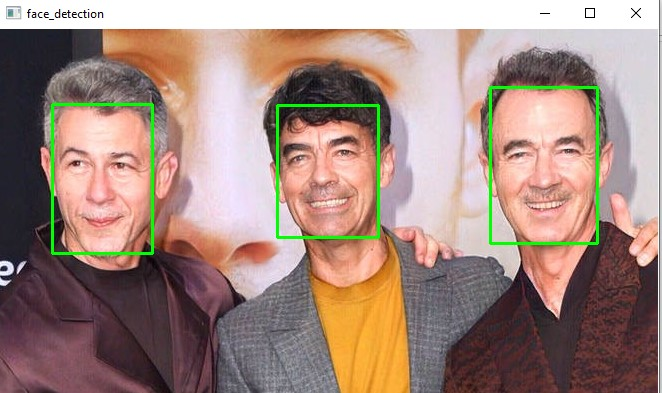

## Multiple faces Detection from Video

In [5]:
# open webcam
webcam = cv2.VideoCapture(0)

if not webcam.isOpened():
    print("Could not open webcam")
    exit()
    

# loop through frames
while webcam.isOpened():

    # read frame from webcam 
    status, frame = webcam.read()

    if not status:
        print("Could not read frame")
        exit()

    # apply face detection
    face, confidence = cvlib.detect_face(image=frame)

    print(face)
    print(confidence)

    # loop through detected faces
    for idx, f in enumerate(face):
        
        (startX, startY) = f[0], f[1]
        (endX, endY) = f[2], f[3]

        # draw rectangle over face
        cv2.rectangle(img=frame, pt1=(startX,startY), pt2=(endX,endY), color=(0,255,0), thickness=2)

        text = "{:.2f}%".format(confidence[idx] * 100)

        Y = startY - 10 if startY - 10 > 10 else startY + 10

        # write confidence percentage on top of face rectangle
        cv2.putText(img=frame, text=text, org=(startX,Y), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7,
                    color=(0,255,0), thickness=2)

    # display output
    cv2.imshow(winname="Real-time face detection", mat=frame)

    # press "Q" to stop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
# release resources
webcam.release()
cv2.destroyAllWindows()      

[[177, 128, 341, 368]]
[0.9997025]
[[189, 124, 348, 368]]
[0.9887552]
[[191, 131, 360, 369]]
[0.9762646]
[[193, 129, 359, 369]]
[0.9849052]
[[194, 130, 356, 368]]
[0.9688719]
[[192, 124, 351, 367]]
[0.9740723]
[[188, 124, 345, 363]]
[0.9939651]
[[183, 124, 341, 363]]
[0.9983974]
[[183, 124, 341, 363]]
[0.9988255]
[[183, 124, 340, 362]]
[0.99851066]
[[186, 125, 345, 365]]
[0.9960383]
[[188, 124, 343, 365]]
[0.99333405]
[[189, 124, 346, 364]]
[0.98928446]
[[189, 123, 346, 363]]
[0.9901177]
[[189, 123, 345, 364]]
[0.9934964]
[[189, 123, 345, 366]]
[0.9925127]
[[187, 124, 345, 366]]
[0.9945964]
[[180, 129, 346, 370]]
[0.9978648]
[[176, 133, 340, 373]]
[0.9994553]
[[175, 134, 340, 373]]
[0.999592]
[[178, 131, 344, 372]]
[0.9988412]


## Gender Detection from Image

In [6]:
# read input image
img = cv2.imread(filename="Image/gender_detection_input.jpg")

# apply face detection
face, conf = cvlib.detect_face(image=img)

padding = 20

# loop through detected faces
for f in face:

    (startX, startY) = max(0, f[0]-padding), max(0, f[1]-padding)
    (endX, endY) = min(img.shape[1]-1, f[2]+padding), min(img.shape[0]-1, f[3]+padding)
    
    # draw rectangle over face
    cv2.rectangle(img=img, pt1=(startX,startY), pt2=(endX,endY), color=(0,255,0), thickness=2)

    face_crop = np.copy(img[startY:endY, startX:endX])

    # apply gender detection
    (label, confidence) = cvlib.detect_gender(face=face_crop)

    print(confidence)
    print(label)

    idx = np.argmax(confidence)
    label = label[idx]

    label = "{}: {:.2f}%".format(label, confidence[idx] * 100)

    Y = startY - 10 if startY - 10 > 10 else startY + 10

    cv2.putText(img, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                0.7, (0, 255, 0), 2)

# display output
# press any key to close window           
cv2.imshow("gender detection", img)
cv2.waitKey()

# save output
cv2.imwrite(filename="Image/gender_detection.jpg", img=img)

# release resources
cv2.destroyAllWindows()

<IPython.core.display.Javascript object>

[INFO] Initializing gender detection model ..
[9.9984848e-01 1.5152809e-04]
['male', 'female']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.05730677 0.9426932 ]
['male', 'female']


<IPython.core.display.Javascript object>

## Gender Detection from WebCam

In [7]:
# open webcam
webcam = cv2.VideoCapture(0)

if not webcam.isOpened():
    print("Could not open webcam")
    exit()
    
padding = 20

# loop through frames
while webcam.isOpened():

    # read frame from webcam 
    status, frame = webcam.read()

    if not status:
        print("Could not read frame")
        exit()

    # apply face detection
    face, confidence = cvlib.detect_face(image=frame)

    print(face)
    print(confidence)

    # loop through detected faces
    for idx, f in enumerate(face):
        
        (startX,startY) = max(0, f[0]-padding), max(0, f[1]-padding)
        (endX,endY) = min(frame.shape[1]-1, f[2]+padding), min(frame.shape[0]-1, f[3]+padding)
    
        # draw rectangle over face
        cv2.rectangle(img=frame, pt1=(startX,startY), pt2=(endX,endY), color=(0,255,0), thickness=2)
        
        face_crop = np.copy(frame[startY:endY, startX:endX])

        # apply face detection    
        (label, confidence) = cvlib.detect_gender(face=face_crop)

        print(confidence)
        print(label)

        idx = np.argmax(confidence)
        label = label[idx]

        label = "{}: {:.2f}%".format(label, confidence[idx] * 100)

        Y = startY - 10 if startY - 10 > 10 else startY + 10

        # write detected gender and confidence percentage on top of face rectangle
        cv2.putText(img=frame, text=label, org=(startX,Y), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7,
                    color=(0,255,0), thickness=2)

    # display output
    cv2.imshow(winname="Real-time gender detection", mat=frame)

    # press "Q" to stop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
# release resources
webcam.release()
cv2.destroyAllWindows()  

[[189, 124, 348, 370]]
[0.9879497]


<IPython.core.display.Javascript object>

[9.9999905e-01 9.5962537e-07]
['male', 'female']


<IPython.core.display.Javascript object>

[[184, 124, 342, 370]]
[0.99817455]


<IPython.core.display.Javascript object>

[9.999993e-01 6.691247e-07]
['male', 'female']


<IPython.core.display.Javascript object>

[[177, 128, 338, 371]]
[0.9997125]


<IPython.core.display.Javascript object>

[9.9999976e-01 1.9607302e-07]
['male', 'female']


<IPython.core.display.Javascript object>

[[171, 127, 337, 370]]
[0.9999225]


<IPython.core.display.Javascript object>

[9.999995e-01 4.973728e-07]
['male', 'female']


<IPython.core.display.Javascript object>

[[173, 128, 337, 371]]
[0.99987924]


<IPython.core.display.Javascript object>

[9.9999976e-01 2.0229434e-07]
['male', 'female']


<IPython.core.display.Javascript object>

[[178, 128, 339, 370]]
[0.9997081]


<IPython.core.display.Javascript object>

[9.9999976e-01 1.8334954e-07]
['male', 'female']


<IPython.core.display.Javascript object>

[[182, 125, 341, 369]]
[0.9990984]


<IPython.core.display.Javascript object>

[9.9999964e-01 4.0541423e-07]
['male', 'female']


<IPython.core.display.Javascript object>

[[182, 124, 339, 368]]
[0.99918526]


<IPython.core.display.Javascript object>

[9.9999928e-01 6.5577234e-07]
['male', 'female']


<IPython.core.display.Javascript object>

[[180, 127, 341, 365]]
[0.9996612]


<IPython.core.display.Javascript object>

[9.9999964e-01 3.5390889e-07]
['male', 'female']


<IPython.core.display.Javascript object>

[[174, 128, 337, 365]]
[0.9998491]


<IPython.core.display.Javascript object>

[9.9999952e-01 4.6852625e-07]
['male', 'female']


<IPython.core.display.Javascript object>

[[167, 123, 330, 364]]
[0.99996626]


<IPython.core.display.Javascript object>

[9.9999857e-01 1.4461219e-06]
['male', 'female']


<IPython.core.display.Javascript object>

[[159, 126, 328, 364]]
[0.99997675]


<IPython.core.display.Javascript object>

[9.999981e-01 1.902499e-06]
['male', 'female']


<IPython.core.display.Javascript object>

[[152, 132, 316, 369]]
[0.99996996]


<IPython.core.display.Javascript object>

[9.999943e-01 5.702098e-06]
['male', 'female']


<IPython.core.display.Javascript object>

[[153, 131, 320, 368]]
[0.99998295]


<IPython.core.display.Javascript object>

[9.9999833e-01 1.6824134e-06]
['male', 'female']


<IPython.core.display.Javascript object>

[[160, 131, 328, 369]]
[0.9999715]


<IPython.core.display.Javascript object>

[9.9998415e-01 1.5848322e-05]
['male', 'female']


<IPython.core.display.Javascript object>

[[146, 137, 317, 376]]
[0.99997103]


<IPython.core.display.Javascript object>

[0.98853356 0.01146644]
['male', 'female']


<IPython.core.display.Javascript object>

[[138, 139, 310, 375]]
[0.999762]


<IPython.core.display.Javascript object>

[0.9973563  0.00264374]
['male', 'female']


<IPython.core.display.Javascript object>

[[147, 137, 317, 376]]
[0.999969]


<IPython.core.display.Javascript object>

[0.995014   0.00498594]
['male', 'female']


<IPython.core.display.Javascript object>

## Object Detection from Image

In [8]:
from cvlib.object_detection import draw_bbox

In [11]:
# read input image
image = cv2.imread(filename="Image/object.jpg")

# apply object detection
bbox, label, confidence = cvlib.detect_common_objects(image=image)

print(bbox, label, confidence)

# draw bounding box over detected objects
output = draw_bbox(img=image, bbox=bbox, labels=label, confidence=confidence)

# display output
# press any key to close window           
cv2.imshow(winname="object_detection", mat=output)
cv2.waitKey()

# save output
# cv2.imwrite("object_detection.jpg", output)

# release resources
cv2.destroyAllWindows()

[[191, 98, 274, 372], [60, 264, 204, 346], [407, 139, 599, 347]] ['person', 'dog', 'horse'] [0.9982799291610718, 0.9948350787162781, 0.9917839765548706]


## Object Detection from webcam

In [13]:
# open webcam
webcam = cv2.VideoCapture(0)

if not webcam.isOpened():
    print("Could not open webcam")
    exit()
    

# loop through frames
while webcam.isOpened():

    # read frame from webcam 
    status, frame = webcam.read()

    if not status:
        print("Could not read frame")
        exit()

    # apply object detection
    bbox, label, conf = cvlib.detect_common_objects(image=frame)

    print(bbox, label, conf)

    # draw bounding box over detected objects
    out = draw_bbox(img=frame, bbox=bbox, labels=label, confidence=conf)

    # display output
    cv2.imshow(winname="Real-time object detection", mat=out)

    # press "Q" to stop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
# release resources
webcam.release()
cv2.destroyAllWindows() 

[[15, 71, 616, 480]] ['person'] [0.9669914841651917]
[[14, 73, 616, 481]] ['person'] [0.9734725952148438]
[[12, 30, 547, 471]] ['person'] [0.9665898680686951]
[[19, 30, 613, 475]] ['person'] [0.9576239585876465]
[[24, 33, 606, 475]] ['person'] [0.9658965468406677]
[[19, 48, 601, 477]] ['person'] [0.9655917286872864]
